In [263]:
# ..................................................................................
# algoritmo PSO que maximiza la funcion f(x) = e^(-0.1(x^2+y^2))*cos(x)sin(y)
# ..................................................................................

import numpy as np

# funcion objetivo hiperboloide eliptico
def funcion_objetivo(x,y):
    return np.exp(-0.1*(x**2+y**2))*np.cos(x)*np.sin(y)

In [264]:
# parametros
num_particulas = 20  # numero de particulas
dim = 2  # dimensiones
cantidad_iteraciones = 50  # maximo numero de iteraciones
c1 = 2  # componente cognitivo
c2 = 2  # componente social
w = 0 # factor de inercia
limite_inf = -50   # limite inferior de busqueda
limite_sup = 50    # limite superior de busqueda

Mejor posición global Inicial [-9.82643789 -0.36551853], Valor 2.0791077791862817e-05


In [299]:
def correr(num_particulas, cantidad_iteraciones, c1, c2, w, verbose=True):
        
    """
    numero de particulas        
    cantidad_iteraciones = 50  # maximo numero de iteraciones
    c1: componente cognitivo
    c2: componente social
    w:  factor de inercia
    verbose: imprimir resultados intermedios
    """

    # inicializacion
    particulas = np.random.uniform(limite_inf, limite_sup, (num_particulas, dim))  # posiciones iniciales de las particulas

    velocidades = np.zeros((num_particulas, dim))  # inicializacion de la matriz de velocidades en cero

    # inicializacion de pbest y gbest
    pbest = particulas.copy()  # mejores posiciones personales iniciales

    fitness_pbest = np.empty(num_particulas)  # mejores fitness personales iniciales
    for i in range(num_particulas):
        fitness_pbest[i] = funcion_objetivo(*particulas[i])

    gbest = pbest[np.argmax(fitness_pbest)]  # mejor posicion global inicial
    fitness_gbest = np.max(fitness_pbest)  # fitness global inicial
    if verbose:
        print(f"Mejor posición global Inicial {gbest}, Valor {fitness_gbest}")

    # busqueda
    gbests = np.empty((cantidad_iteraciones,3)) #creo este array para almacenar los gbest de cada iteracion
    for iteracion in range(cantidad_iteraciones):
        for i in range(num_particulas):  # iteracion sobre cada partícula
            r1, r2 = np.random.rand(), np.random.rand()  # generacion dos numeros aleatorios

            # actualizacion de la velocidad de la particula en cada dimension
            for d in range(dim):
                velocidades[i][d] = (w * velocidades[i][d] + c1 * r1 * (pbest[i][d] - particulas[i][d]) + c2 * r2 * (gbest[d] - particulas[i][d]))

            for d in range(dim):
                particulas[i][d] = particulas[i][d] + velocidades[i][d]  # cctualizacion de la posicion de la particula en cada dimension

                # mantenimiento de las partículas dentro de los limites
                particulas[i][d] = np.clip(particulas[i][d], limite_inf, limite_sup)

            fitness = funcion_objetivo(*particulas[i])  # Evaluacion de la funcion objetivo para la nueva posicion

            # actualizacion el mejor personal
            if fitness > fitness_pbest[i]:
                fitness_pbest[i] = fitness  # actualizacion del mejor fitness personal
                pbest[i] = particulas[i].copy()  # actualizacion de la mejor posicion personal

                # actualizacion del mejor global
                if fitness > fitness_gbest:
                    fitness_gbest = fitness  # actualizacion del mejor fitness global
                    gbest = particulas[i].copy()  # actualizacion de la mejor posicion global

        # imprimir el mejor global en cada iteracion
        if verbose:
            print(f"Iteración {iteracion + 1}: Mejor posición global {gbest}, Valor {fitness_gbest}")
        gbests[iteracion,0] = gbest[0]
        gbests[iteracion,1] = gbest[1]
        gbests[iteracion,2] = fitness_gbest

    # resultado
    solucion_optima = gbest  # mejor posicion global final
    valor_optimo = fitness_gbest  # mejor fitness global final
    return solucion_optima, valor_optimo, gbests

solucion_optima, valor_optimo, gbests = correr(num_particulas, cantidad_iteraciones, c1, c2, w)
print("\nSolucion optima (x):", solucion_optima)
print("Valor optimo:", valor_optimo)

Mejor posición global Inicial [-19.74731015   6.87484384], Valor 3.572423057119542e-20
Iteración 1: Mejor posición global [-8.21538426  4.9359467 ], Valor 3.5342029029240635e-05
Iteración 2: Mejor posición global [-8.78008128  4.14653193], Valor 5.4253326651735605e-05
Iteración 3: Mejor posición global [-1.45537286 -4.70390452], Valor 0.010194695030950761
Iteración 4: Mejor posición global [-1.45537286 -4.70390452], Valor 0.010194695030950761
Iteración 5: Mejor posición global [-6.52819522  1.42558069], Valor 0.011044060628568763
Iteración 6: Mejor posición global [-6.52819522  1.42558069], Valor 0.011044060628568763
Iteración 7: Mejor posición global [-5.69737016  0.42169576], Valor 0.013043312841207645
Iteración 8: Mejor posición global [ 3.23649722 -0.17466156], Valor 0.06050392379598881
Iteración 9: Mejor posición global [-3.20565686 -2.09488522], Valor 0.19935747994656372
Iteración 10: Mejor posición global [-0.90416535  1.85900823], Valor 0.38667228973868323
Iteración 11: Mejor p

In [289]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.ticker import LinearLocator

X = np.linspace(0.1*limite_inf, 0.1*limite_sup, 1000)
Y = np.linspace(0.1*limite_inf, 0.1*limite_sup, 1000)

X, Y = np.meshgrid(X, Y)

C = funcion_objetivo(X, Y)

In [290]:
funcion_objetivo(0.01366263,1.32143707)
C.max()

0.8138171431966312

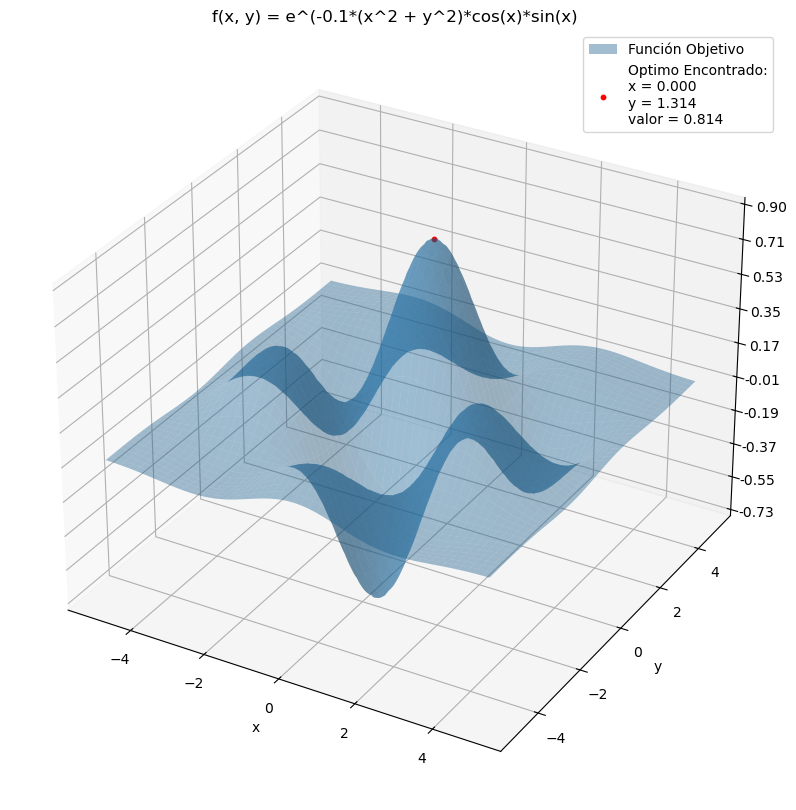

In [291]:
import matplotlib.pyplot as plt



fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(X, Y, C,
                       linewidth=0, antialiased=True, alpha=0.4,
                       label='Función Objetivo')

# Customize the z axis.
ax.set_zlim(C.min()-C.min()*.1, C.max()+C.max()*.1)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)
f_de_x_y = f'f(x, y) = e^(-0.1*(x^2 + y^2)*cos(x)*sin(x)'

fig.set_size_inches(10,10)
ax.set_title(f_de_x_y)
ax.set_xlabel("x")
ax.set_ylabel("y")


leyenda = f'Optimo Encontrado:\nx = {solucion_optima[0]:.3f}\ny = {solucion_optima[1]:.3f}\nvalor = {valor_optimo:.3f}'

ax.scatter(*solucion_optima, valor_optimo, c='red', marker='o', s=10, label=leyenda)

plt.legend()

# ax.view_init()

plt.show()


In [270]:
f_de_x_y

'f(x, y) = e^(-0.1*(x^2 + y^2)*cos(x)*sin(x)'

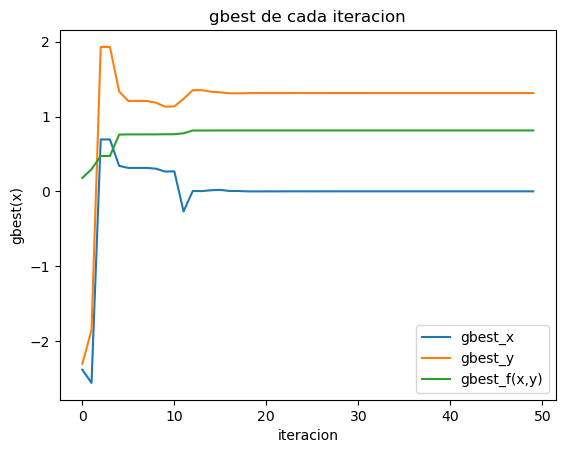

In [292]:
variable = ['x','y','f(x,y)']
for i in range(3):
    plt.plot(gbests[:,i], label=f'gbest_{variable[i]}')
# plt.plot(gbests[:,1], label='fitness_gbest(y)')
plt.title('gbest de cada iteracion')
plt.xlabel('iteracion')
plt.ylabel('gbest(x)')
plt.legend()
plt.show()

In [293]:
# Inercia 0

solucion_optima, valor_optimo, gbests = correr(num_particulas, cantidad_iteraciones, c1, c2, 0)
print("\nSolucion optima (x):", solucion_optima)
print("Valor optimo:", valor_optimo)

Mejor posición global Inicial [4.09500289 5.94947941], Valor 0.001028889231713193
Iteración 1: Mejor posición global [-0.34502969 -4.4678394 ], Valor 0.12257757235073093
Iteración 2: Mejor posición global [-0.01229001 -4.1063964 ], Valor 0.1522195924655239
Iteración 3: Mejor posición global [-0.01229001 -4.1063964 ], Valor 0.1522195924655239
Iteración 4: Mejor posición global [ 3.02549637 -0.6102136 ], Valor 0.219555854341283
Iteración 5: Mejor posición global [ 2.87677475 -0.78568039], Valor 0.2805267943254103
Iteración 6: Mejor posición global [ 2.82567066 -0.83219166], Valor 0.29512493982497434
Iteración 7: Mejor posición global [ 2.53500679 -1.15910891], Valor 0.34620188962681225
Iteración 8: Mejor posición global [ 2.52371084 -1.17072121], Valor 0.34622491620382967
Iteración 9: Mejor posición global [ 2.5232673 -1.1717311], Valor 0.34625897852611975
Iteración 10: Mejor posición global [ 2.64759687 -1.18884996], Valor 0.351893037895635
Iteración 11: Mejor posición global [ 2.651162

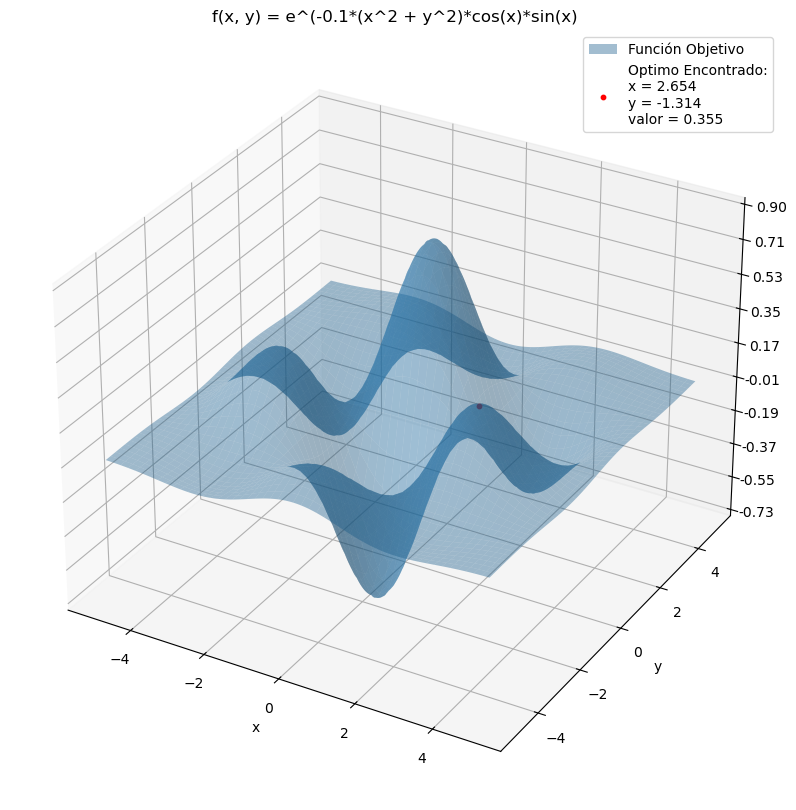

In [294]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(X, Y, C,
                       linewidth=0, antialiased=True, alpha=0.4,
                       label='Función Objetivo')

# Customize the z axis.
ax.set_zlim(C.min()-C.min()*.1, C.max()+C.max()*.1)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)
f_de_x_y = f'f(x, y) = e^(-0.1*(x^2 + y^2)*cos(x)*sin(x)'

fig.set_size_inches(10,10)
ax.set_title(f_de_x_y)
ax.set_xlabel("x")
ax.set_ylabel("y")


leyenda = f'Optimo Encontrado:\nx = {solucion_optima[0]:.3f}\ny = {solucion_optima[1]:.3f}\nvalor = {valor_optimo:.3f}'

ax.scatter(*solucion_optima, valor_optimo, c='red', marker='o', s=10, label=leyenda)

plt.legend()

# ax.view_init()

plt.show()

In [345]:
# inciso f: Diferentes inercias

0.813832546331537

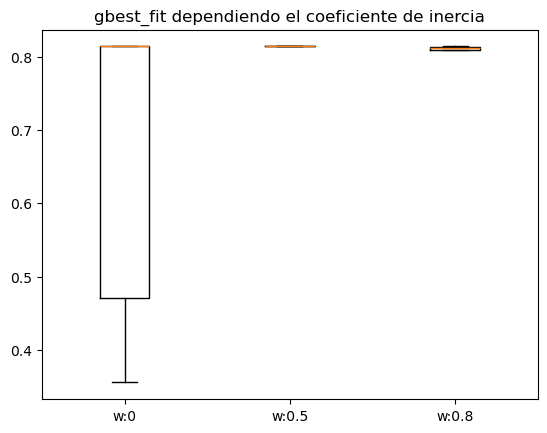

In [358]:

lanzadas = 10
resultados1 = []
W = [0, 0.5, 0.8]
for i in range(lanzadas):
    resultados1.append(correr(num_particulas, cantidad_iteraciones, c1, c2, W[0], False)[1])

resultados2 = []
for i in range(lanzadas):
    resultados2.append(correr(num_particulas, cantidad_iteraciones, c1, c2, W[1], False)[1])

resultados3 = []
for i in range(lanzadas):
    resultados3.append(correr(num_particulas, cantidad_iteraciones, c1, c2, W[2], False)[1])

plt.boxplot([resultados1, resultados2, resultados3], showfliers=False)
plt.xticks([1, 2, 3], [f'w:{W[0]}', f'w:{W[1]}', f'w:{W[2]}'])
plt.title('gbest_fit dependiendo el coeficiente de inercia')
plt.show()